Họ tên: Nguyễn Minh Vũ

MSSV: 1712920

# BT02: Cách thực thi song song trong CUDA

Bạn có thể tùy ý thêm/xóa cell. Đừng xóa mấy cell đề mục của mình là được.

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# %cd "./"

Mounted at /content/drive


## Câu 1A

In [ ]:
!nvcc bt02_p1.cu -o bt02_p1 --ptxas-options=-v

/content/drive/MyDrive/Study/CUDA/BT02
ptxas info    : 0 bytes gmem
ptxas info    : Compiling entry function '_Z17reduceBlksKernel3PiiS_' for 'sm_30'
ptxas info    : Function properties for _Z17reduceBlksKernel3PiiS_
    0 bytes stack frame, 0 bytes spill stores, 0 bytes spill loads
ptxas info    : Used 12 registers, 344 bytes cmem[0]
ptxas info    : Compiling entry function '_Z17reduceBlksKernel2PiiS_' for 'sm_30'
ptxas info    : Function properties for _Z17reduceBlksKernel2PiiS_
    0 bytes stack frame, 0 bytes spill stores, 0 bytes spill loads
ptxas info    : Used 13 registers, 344 bytes cmem[0]
ptxas info    : Compiling entry function '_Z17reduceBlksKernel1PiiS_' for 'sm_30'
ptxas info    : Function properties for _Z17reduceBlksKernel1PiiS_
    0 bytes stack frame, 0 bytes spill stores, 0 bytes spill loads
ptxas info    : Used 14 registers, 344 bytes cmem[0]


In [ ]:
!./bt02_p1

**********GPU info**********
Name: Tesla P100-PCIE-16GB
Compute capability: 6.0
Num SMs: 56
Max num threads per SM: 2048
Max num warps per SM: 64
GMEM: 17071734784 bytes
****************************

Input size: 16777217

Kernel 1
Grid size: 16385, block size: 512
Kernel time = 1.227456 ms, post-kernel time = 0.076384 ms
CORRECT :)

Kernel 2
Grid size: 16385, block size: 512
Kernel time = 1.100928 ms, post-kernel time = 0.048736 ms
CORRECT :)

Kernel 3
Grid size: 16385, block size: 512
Kernel time = 0.555008 ms, post-kernel time = 0.049120 ms
CORRECT :)


`Kernel time` của 3 hàm kernel giảm dần. Đặc biệt, `Kernel time` của *Kernel 3* chỉ bằng một nửa so với 2 kernel còn lại. Điều đó xảy ra là do ở mỗi *Kernel* ta có cách tận dụng các *warp* khác nhau. *Kernel 3* có ít *warp* bị phân kì nhất nên cơ chế che độ trễ phát huy tác dụng tốt nhất.

## Câu 1B


In [ ]:
!./bt02_p1 1024

**********GPU info**********
Name: Tesla P100-PCIE-16GB
Compute capability: 6.0
Num SMs: 56
Max num threads per SM: 2048
Max num warps per SM: 64
GMEM: 17071734784 bytes
****************************

Input size: 16777217

Kernel 1
Grid size: 8193, block size: 1024
Kernel time = 1.444576 ms, post-kernel time = 0.029536 ms
CORRECT :)

Kernel 2
Grid size: 8193, block size: 1024
Kernel time = 1.261056 ms, post-kernel time = 0.030496 ms
CORRECT :)

Kernel 3
Grid size: 8193, block size: 1024
Kernel time = 0.592768 ms, post-kernel time = 0.029472 ms
CORRECT :)


In [ ]:
!./bt02_p1 512

**********GPU info**********
Name: Tesla P100-PCIE-16GB
Compute capability: 6.0
Num SMs: 56
Max num threads per SM: 2048
Max num warps per SM: 64
GMEM: 17071734784 bytes
****************************

Input size: 16777217

Kernel 1
Grid size: 16385, block size: 512
Kernel time = 1.264768 ms, post-kernel time = 0.051168 ms
CORRECT :)

Kernel 2
Grid size: 16385, block size: 512
Kernel time = 1.100032 ms, post-kernel time = 0.053632 ms
CORRECT :)

Kernel 3
Grid size: 16385, block size: 512
Kernel time = 0.559424 ms, post-kernel time = 0.051296 ms
CORRECT :)


In [ ]:
!./bt02_p1 256

**********GPU info**********
Name: Tesla P100-PCIE-16GB
Compute capability: 6.0
Num SMs: 56
Max num threads per SM: 2048
Max num warps per SM: 64
GMEM: 17071734784 bytes
****************************

Input size: 16777217

Kernel 1
Grid size: 32769, block size: 256
Kernel time = 1.083264 ms, post-kernel time = 0.090112 ms
CORRECT :)

Kernel 2
Grid size: 32769, block size: 256
Kernel time = 0.973312 ms, post-kernel time = 0.089568 ms
CORRECT :)

Kernel 3
Grid size: 32769, block size: 256
Kernel time = 0.513728 ms, post-kernel time = 0.089792 ms
CORRECT :)


In [ ]:
!./bt02_p1 128

**********GPU info**********
Name: Tesla P100-PCIE-16GB
Compute capability: 6.0
Num SMs: 56
Max num threads per SM: 2048
Max num warps per SM: 64
GMEM: 17071734784 bytes
****************************

Input size: 16777217

Kernel 1
Grid size: 65537, block size: 128
Kernel time = 0.980544 ms, post-kernel time = 0.206144 ms
CORRECT :)

Kernel 2
Grid size: 65537, block size: 128
Kernel time = 0.887872 ms, post-kernel time = 0.167232 ms
CORRECT :)

Kernel 3
Grid size: 65537, block size: 128
Kernel time = 0.463808 ms, post-kernel time = 0.167104 ms
CORRECT :)


Block size | Grid size | Num blocks / SM | Occupancy (%) | Kernel time (ms) | Post-kernel time (ms) | Total time (ms)
--- | --- | --- | --- | --- | --- | ---
1024 | 8193 | 2 | 100 | 1.444576 | 0.029536 | 1.474112
512 | 16385 | 4 | 100 | 1.264768 | 0.051168 | 1.315936
256 | 32769 | 8 | 100 | 1.083264 | 0.090112 | 1.173376
128 | 65537 | 16 | 100 | 0.980544 | 0.206144 | 1.186688

Cách tính $\textit{Num blocks / SM}$ và $Occupancy$
- $$\textit{Num blocks / SM} = \frac{\text{Max num threads / SM}}{\text{Threads / block}}$$

    Ở đây, $\text{Threads / block}$ chính là $blockSize$

- $$\textit{Occupancy} = \frac{\text{Num active warps / SM}}{\text{Max num warps / SM}}$$ 

    Với $\text{Num active warps / SM} = \frac{\text{Threads / block}}{\text{Threads / warp}} \cdot \text{Num blocks / SM}$

$$---$$
*Ví dụ: $blockSize \ (\text{Threads / block}) = 256$*

*Khi đó các thông số trên đối với GPU Tesla P100 với CC = 6.0 là*

$\textit{Num blocks / SM} = \frac{\text{Max num threads / SM}}{\text{Threads / block}} = \frac{2048}{256} = 8$


$\textit{Num active warps / SM} = \frac{\text{Threads / block}}{\text{Threads / warp}} \cdot \text{Num blocks / SM} = \frac{256}{32} \cdot 8 = 64$

$\textit{Occupancy} = \frac{\text{Num active warps / SM}}{\text{Max num warps / SM}} = \frac{64}{64} = 1 \ (100\%) $

Từ bảng trên, ta thấy khi giảm `blockSize` thì `Kernel time` giảm còn `Post-kernel time` tăng.

- `Kernel time` là thời gian mà `device` tính toán song song trên `gridSize.x` block, mỗi block gồm `blockSize.x` thread. Do cách triển khai code, `blockSize` nhỏ dần thì số lần tăng của `stride` cũng giảm dần. Với cùng `Occupancy` là 100%, khi `blockSize = 512` thì `stride` phải tăng tối đa đến `256`, còn `blockSize = 128`, `stride` chỉ tăng tối đa đến `64`. Nhờ cơ chế *che độ trễ* 16385 `block` có `stride` dài hơn sẽ mất nhiều thời gian để reduce hơn so 65537 `block` co` `stride` ngắn.


- `Post-kernel time` là thời gian mà `host` duyệt qua mảng `out` có kích thước `gridSize.x` để cộng các kết quả cuối cùng. Do `blockSize` càng giảm thì `gridSize` càng tăng nên `Post-kernel time` tăng theo.

## Câu 2

In [ ]:
!nvcc bt02_p2.cu -o bt02_p2 --ptxas-options=-v

/content/drive/MyDrive/Study/CUDA/BT02
ptxas info    : 0 bytes gmem
ptxas info    : Compiling entry function '_Z12addVecKernelPiS_iS_' for 'sm_30'
ptxas info    : Function properties for _Z12addVecKernelPiS_iS_
    0 bytes stack frame, 0 bytes spill stores, 0 bytes spill loads
ptxas info    : Used 8 registers, 352 bytes cmem[0]


In [ ]:
!nvprof -o bt02_p2_1s.nvvp -f ./bt02_p2 512 #1

n =  16777217

==594== NVPROF is profiling process 594, command: ./bt02_p2 512
GPU name: Tesla P100-PCIE-16GB
GPU compute capability: 6.0
Processing time of all device streams: 16.589056 ms

CORRECT :)
==594== Generated result file: /content/drive/My Drive/Study/CUDA/BT02/bt02_p2_1s.nvvp


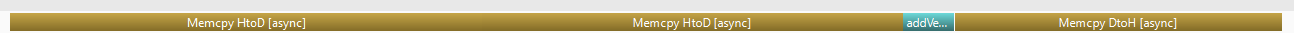

In [ ]:
!nvprof -o bt02_p2_3s.nvvp -f ./bt02_p2 512 3

n =  16777217

==605== NVPROF is profiling process 605, command: ./bt02_p2 512 3
GPU name: Tesla P100-PCIE-16GB
GPU compute capability: 6.0
Processing time of all device streams: 14.023232 ms

CORRECT :)
==605== Generated result file: /content/drive/My Drive/Study/CUDA/BT02/bt02_p2_3s.nvvp


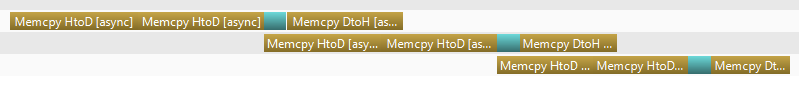